<a href="https://colab.research.google.com/github/Mikhail-068/Android_homework_4_Fashion_mnist/blob/master/%22Fashion_mnist%22_(%D0%A0%D0%B0%D0%B7%D0%B1%D0%BE%D1%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Импорт библиотек

In [ ]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dense, Activation, Dropout, \
                              BatchNormalization, Flatten, \
                              MaxPooling2D, Rescaling
import tensorflow.lite as lite
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
import os
from tqdm.notebook import tqdm_notebook as tq
import zipfile
import tensorflow as tf

###Вывод примеров

In [ ]:
x_train.shape

(50000, 28, 28)

In [ ]:
# Загрузка датасета
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, shuffle=True, test_size=0.16666)

# Вывод размерностей выборок

print('Размер x_train:',x_train.shape)
print('Размер y_train:',y_train.shape)
print('Размер x_test:',x_test.shape)
print('Размер y_test:',y_test.shape)
print('Размер x_val:',x_val.shape)
print('Размер y_val:',y_val.shape)

4422102/4422102 [==============================] - 0s 0us/step
Размер x_train: (50000, 28, 28)
Размер y_train: (50000,)
Размер x_test: (10000, 28, 28)
Размер y_test: (10000,)
Размер x_val: (10000, 28, 28)
Размер y_val: (10000,)


In [ ]:
# @title Callback
# Импортируем модуль load_model из tensorflow.keras.models для загрузки модели
from tensorflow.keras.models import load_model
# Импортируем модуль LambdaCallback из tensorflow.keras.callbacks для создания кастомного коллбэка
from tensorflow.keras.callbacks import LambdaCallback
# Импортируем модуль seaborn для настройки стиля графиков
import seaborn as sns
# Устанавливаем стиль графиков в darkgrid
sns.set_style('darkgrid')

# Определяем ANSI-коды для цветов, которые будем использовать в выводе
CYAN = '\033[36m'
BLUE = '\033[44m'
WHITE = '\033[37;1m'
RESET = '\033[0m'

# Определяем класс Callback, который наследует от базового класса object
class Callback(object):
  """Класс для кастомного коллбэка при обучении модели."""

  # Определяем метод on_train_begin, который вызывается в начале обучения
  def on_train_begin(self, logs):
    """Метод, вызываемый в начале обучения."""
    # Печатаем заголовок с цветом CYAN и сбрасываем цвет в конце
    print(CYAN + '========= Education =========' + RESET)
    print('------------------------------')
    # Создаем словарь для хранения текущих значений точности на валидации по эпохам
    self.curr = {}
    # Создаем переменную для хранения лучшего значения точности на валидации
    self.best_val = 0
    # Создаем переменную для хранения пути к файлу с лучшей моделью
    self.path = 'best_model.keras'

    # Создаем словарь для хранения истории обучения по метрикам
    self.hs = {}
    self.hs['loss'] = [] # Список для хранения значений функции потерь на обучающей выборке по эпохам
    self.hs['val_loss'] = [] # Список для хранения значений функции потерь на валидационной выборке по эпохам
    self.hs['accuracy'] = [] # Список для хранения значений точности на обучающей выборке по эпохам
    self.hs['val_accuracy'] = [] # Список для хранения значений точности на валидационной выборке по эпохам


  # Определяем метод on_epoch_end, который вызывается в конце каждой эпохи
  def on_epoch_end(self, epoch, logs):
    """Метод, вызываемый в конце каждой эпохи."""
    # Добавляем значения метрик из аргумента logs в соответствующие списки в словаре hs
    self.hs['loss'].append(logs['loss'])
    self.hs['val_loss'].append(logs['val_loss'])
    self.hs['accuracy'].append(logs['accuracy'])
    self.hs['val_accuracy'].append(logs['val_accuracy'])
    # Округляем значение точности на валидации до четырех знаков после запятой и сохраняем его в переменной curr_val
    self.curr_val = round(logs['val_accuracy'], 4)
    # Добавляем пару ключ-значение в словарь curr, где ключ - номер эпохи, а значение - точность на валидации
    self.curr[epoch] = self.curr_val

    # Если текущее значение точности на валидации больше лучшего значения, то обновляем лучшее значение и сохраняем модель в файл по пути path
    if self.best_val < self.curr_val:
      self.best_val = self.curr_val
      model.save(self.path)

  # Определяем метод on_train_end, который вызывается в конце обучения
  def on_train_end(self, logs):
    """Метод, вызываемый в конце обучения."""
    # Объявляем глобальную переменную model, чтобы иметь к ней доступ извне класса
    global model
    # Загружаем лучшую модель из файла по пути path и присваиваем ее переменной model
    model = load_model(self.path)

    # Проходимся по всем парам ключ-значение в словаре curr
    for key, val in self.curr.items():
      # Если значение равно максимальному значению в словаре curr, то печатаем номер эпохи и значение точности на валидации с цветом BLUE и WHITE и сбрасываем цвет в конце
      if val == max(self.curr.values()):
        print(BLUE + WHITE + 'epoch: {} val_acc: {}'.format(key+1,val) + RESET)
      # Иначе печатаем номер эпохи и значение точности на валидации без цвета
      else:
        print('epoch: {} val_accuracy: {} '.format(key+1,val))
    # Печатаем разделительную линию
    print('-------------------------------')
    # Печатаем сообщение о завершении обучения с цветом CYAN и сбрасываем цвет в конце
    print(CYAN + '====== Training completed ====' + RESET)
    print('===============================')

    # Создаем фигуру с двумя подграфиками с помощью matplotlib.pyplot (импортирован как plt)
    plt.figure(2, figsize=(16,5))

    # Выбираем первый подграфик (слева)
    plt.subplot(121)
    # Задаем заголовок подграфика с текстом 'Accuracy' и параметрами fontsize и color
    plt.title('Accuracy', fontsize=18, color='grey')
    # Рисуем линию с данными из списка hs['accuracy'], меткой 'accuracy' и цветом 'blue'
    plt.plot(self.hs['accuracy'], label='accuracy', c='blue')
     # Рисуем линию с данными из списка hs['val_accuracy'], меткой 'val_accuracy' и цветом 'red'
    plt.plot(self.hs['val_accuracy'], label='val_accuracy', c='red')
     # Задаем подпись оси y с текстом '% accuracy' и параметрами fontsize и color
    plt.ylabel('% accuracy', fontsize = 13, color = 'grey')
     # Задаем подпись оси x с текстом 'epoch' и параметрами fontsize и color
    plt.xlabel('epoch', fontsize = 13, color = 'grey')
     # Выводим легенду подграфика с метками линий
    plt.legend()

     # Выбираем второй подграфик (справа)
    plt.subplot(122)
     # Задаем заголовок подграфика с текстом 'Loss' и параметрами fontsize и color
    plt.title('Loss', fontsize=18, color='grey')
     # Рисуем линию с данными из списка hs['loss'], меткой 'loss' и цветом 'blue'
    plt.plot(self.hs['loss'], label='loss', c='blue')
     # Рисуем линию с данными из списка hs['val_loss'], меткой 'val_loss' и цветом 'red'
    plt.plot(self.hs['val_loss'], label='val_loss', c='red')
     # Задаем подпись оси y с текстом 'error' и параметрами fontsize и color
    plt.ylabel('error', fontsize = 13, color = 'grey')
     # Задаем подпись оси x с текстом 'epoch' и параметрами fontsize и color
    plt.xlabel('epoch', fontsize = 13, color = 'grey')
     # Выводим легенду подграфика с метками линий
    plt.legend()
     # Показываем фигуру на экране
    plt.show()


# Создаем экземпляр класса Callback и присваиваем его переменной CaLL
CaLL = Callback()

# Создаем экземпляр класса LambdaCallback и присваиваем его переменной lamCB
# Передаем в конструктор методы on_train_begin, on_epoch_end и on_train_end из экземпляра CaLL
lamCB = LambdaCallback(on_train_begin = CaLL.on_train_begin,
                       on_epoch_end = CaLL.on_epoch_end,
                       on_train_end = CaLL.on_train_end)


In [ ]:
model = Sequential()

model.add(Rescaling(scale=1./255, offset=0.0, input_shape=(28,28,1)))
model.add(Conv2D(32, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation="softmax")) # Добавление полносвязного слоя на 10 нейронов с softmax-активацией

# Компиляция модели
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Обучение модели
model.fit(x_train, # обучающая выборка экземпляры класса
          y_train,  # обучающая выборка метки класса
          batch_size=128,  # размер батча
          epochs=30,  # количество эпох
          verbose=1, # 0 - не показывать ход обучения, 1 - показывать
          validation_data=(x_val, y_val),
          callbacks=lamCB)


ev_list = model.evaluate(x_test, y_test)

========= Education =========
------------------------------
Epoch 1/10
391/391 [==============================] - 13s 21ms/step - loss: 0.1429 - accuracy: 0.9496 - val_loss: 0.1818 - val_accuracy: 0.9363
Epoch 2/10
391/391 [==============================] - 8s 20ms/step - loss: 0.1285 - accuracy: 0.9546 - val_loss: 0.1824 - val_accuracy: 0.9376
Epoch 3/10
391/391 [==============================] - 8s 20ms/step - loss: 0.1213 - accuracy: 0.9570 - val_loss: 0.1840 - val_accuracy: 0.9380
Epoch 4/10
391/391 [==============================] - 8s 21ms/step - loss: 0.1177 - accuracy: 0.9584 - val_loss: 0.1818 - val_accuracy: 0.9386
Epoch 5/10
391/391 [==============================] - 8s 20ms/step - loss: 0.1118 - accuracy: 0.9604 - val_loss: 0.1824 - val_accuracy: 0.9389
Epoch 6/10
391/391 [==============================] - 8s 20ms/step - loss: 0.1063 - accuracy: 0.9614 - val_loss: 0.1871 - val_accuracy: 0.9388
Epoch 7/10
391/391 [==============================] - 8s 20ms/step - loss: 0.102

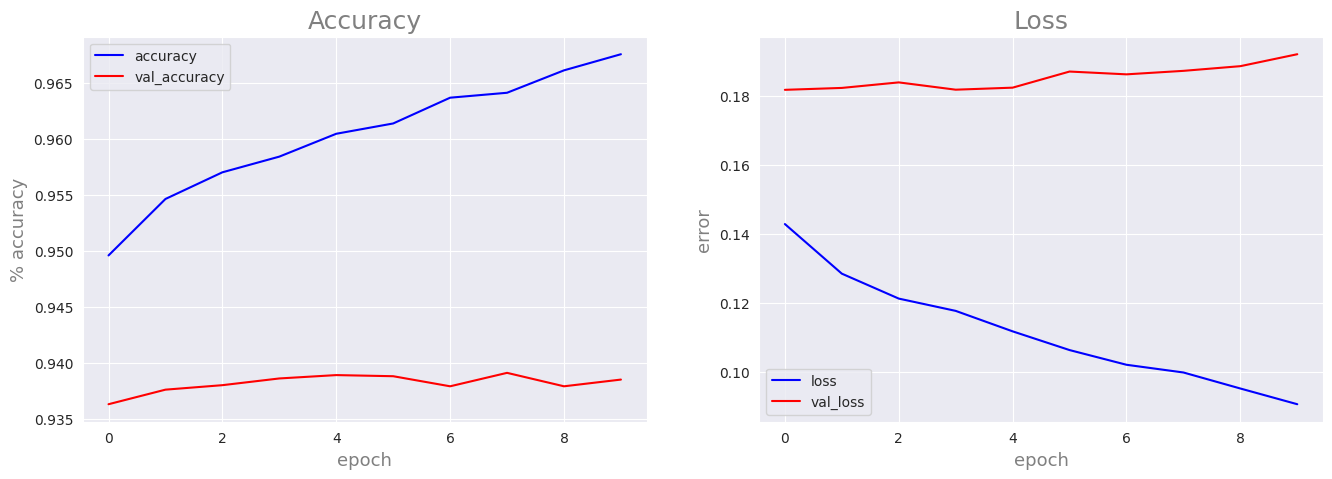

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(learning_rate=1e-4),
              metrics=["accuracy"])

# Обучение модели
model.fit(x_train, # обучающая выборка экземпляры класса
          y_train,  # обучающая выборка метки класса
          batch_size=128,  # размер батча
          epochs=10,  # количество эпох
          verbose=1, # 0 - не показывать ход обучения, 1 - показывать
          validation_data=(x_val, y_val),
          callbacks=lamCB)

========= Education =========
------------------------------
Epoch 1/30
391/391 [==============================] - 14s 22ms/step - loss: 0.0938 - accuracy: 0.9673 - val_loss: 0.1870 - val_accuracy: 0.9388
Epoch 2/30
391/391 [==============================] - 8s 21ms/step - loss: 0.0929 - accuracy: 0.9662 - val_loss: 0.1876 - val_accuracy: 0.9388
Epoch 3/30
391/391 [==============================] - 8s 20ms/step - loss: 0.0923 - accuracy: 0.9677 - val_loss: 0.1875 - val_accuracy: 0.9385
Epoch 4/30
391/391 [==============================] - 8s 20ms/step - loss: 0.0906 - accuracy: 0.9676 - val_loss: 0.1872 - val_accuracy: 0.9386
Epoch 5/30
391/391 [==============================] - 8s 20ms/step - loss: 0.0917 - accuracy: 0.9676 - val_loss: 0.1875 - val_accuracy: 0.9382
Epoch 6/30
391/391 [==============================] - 8s 21ms/step - loss: 0.0921 - accuracy: 0.9679 - val_loss: 0.1875 - val_accuracy: 0.9389
Epoch 7/30
391/391 [==============================] - 8s 20ms/step - loss: 0.089

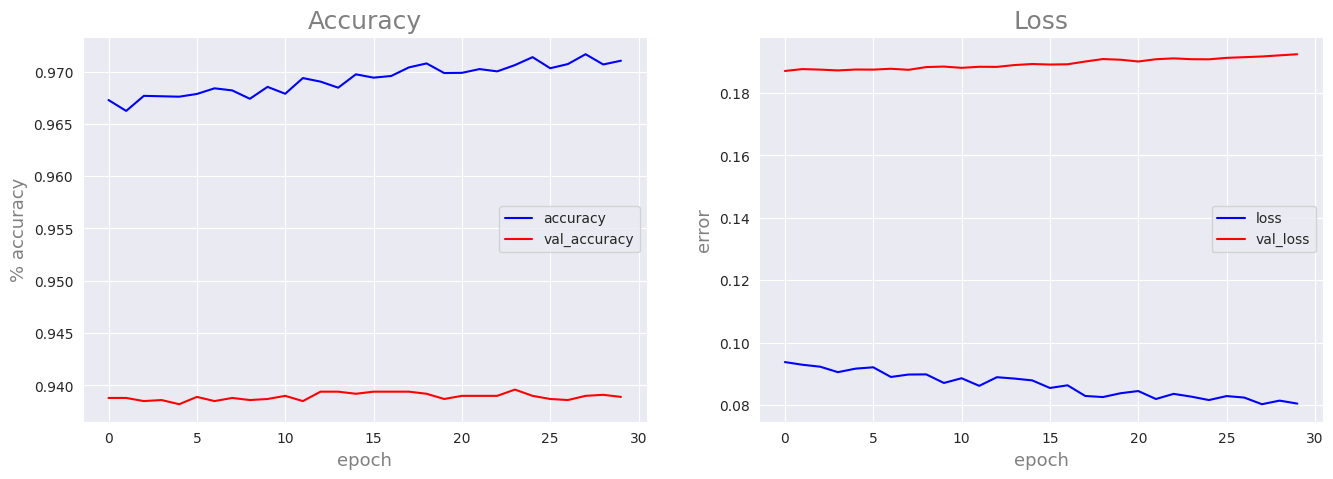

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(learning_rate=1e-5),
              metrics=["accuracy"])

# Обучение модели
model.fit(x_train, # обучающая выборка экземпляры класса
          y_train,  # обучающая выборка метки класса
          batch_size=128,  # размер батча
          epochs=30,  # количество эпох
          verbose=1, # 0 - не показывать ход обучения, 1 - показывать
          validation_data=(x_val, y_val),
          callbacks=lamCB)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Android/Лекция 3/model_FM.keras')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***Конвиртируем в TF Lite***

In [ ]:
path = ('/content/drive/MyDrive/Colab Notebooks/Android/Лекция 3/model_FM.keras')

model = load_model(path)
round(model.evaluate(x_test, y_test, verbose=0)[1], 4)

0.9027

In [ ]:
# @title show_size
def show_size(model_1, model_2):
  # Сохраняем файлы
  model_1.save("model.keras")
  open("model.tflite", "wb").write(model_2)

  # Получаем размер в байтах
  keras_size = os.path.getsize("model.keras")
  tflite_size = os.path.getsize("model.tflite")

  #Конвертируем в мегабайты
  keras_size = round(keras_size/ 1e6, 1)
  tflite_size = round(tflite_size/ 1e6, 1)

  print(f"Keras: {keras_size} MB" )
  print(f"tfLITE: {tflite_size} MB")

In [ ]:
# Создаем конвертер на основе модели Keras
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Включаем оптимизации модели по умолчанию
# Это сделает модель более компактной и эффективной
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Конвертируем модель в формат TensorFlow Lite
tflite_model = converter.convert()

show_size(model, tflite_model)

Keras: 58.8 MB
tfLITE: 4.9 MB


### *Сохраним изображения test fashion mnist*

---



In [ ]:
!rm -r images

rm: cannot remove 'images': No such file or directory


In [ ]:
# Классы
class_names = ['Футболка', 'Брюки', 'Свитер', 'Платье', 'Пальто',
               'Сандалии', 'Рубашка', 'Кроссовки', 'Сумка', 'Ботинки']

# Выбираем по 10 изображений на класс
num_samples = 10
x_samples = []
y_samples = []

for c in range(len(class_names)):
  indices = np.where(y_test == c)[0]
  class_samples = np.random.choice(indices, num_samples)

  x_class_samples = x_test[class_samples]
  y_class_samples = y_test[class_samples]

  x_samples.append(x_class_samples)
  y_samples.append(y_class_samples)

x_samples = np.vstack(x_samples)
y_samples = np.hstack(y_samples)

# Создаем папку для сохранения
if not os.path.exists('images'):
    os.mkdir('images')

# Сохраняем изображения
for i in tq(range(len(x_samples)), desc='Сохранение'):
  img = x_samples[i]/255.0
  img = img.reshape((28,28))
  label = class_names[y_samples[i]]

  name = label + '_' + str(i) + '.png'
  path = os.path.join('images', name)

  plt.imsave(path, img, cmap='gray')

print('Готово!')

Сохранение:   0%|          | 0/100 [00:00<?, ?it/s]

Готово!


In [ ]:
# Массив с именами классов
class_names = ['Футболка', 'Брюки', 'Свитер', 'Платье', 'Пальто',
               'Сандалии', 'Рубашка', 'Кроссовки', 'Сумка', 'Ботинки']

# Массив с именами классов для тестовых данных
y_test_labels = [class_names[y] for y in y_test]

if not os.path.exists('images'):
    os.mkdir('images')

for i in tq(range(len(x_test)), desc='Сохранение изображений'):
    image = x_test[i] / 255.
    image = np.squeeze(image)
    image = image.reshape((28,28))

    # Имя класса и номер
    name = y_test_labels[i] + '_' + str(i)

    image_path = os.path.join('images', name + '.png')
    plt.imsave(image_path, image, cmap='gray')

print('Готово!')

Сохранение изображений:   0%|          | 0/10000 [00:00<?, ?it/s]

Готово!


In [ ]:
# Создание ZIP архива
zip_path = 'images.zip'
with zipfile.ZipFile(zip_path, 'w') as zipf:
    for file in os.listdir('images'):
        file_path = os.path.join('images', file)
        zipf.write(file_path, arcname=file)

print('Архив успешно создан!')

Архив успешно создан!


In [ ]:
import tensorflow.lite as lite

In [ ]:
# Загрузка модели TFLite
interpreter = lite.Interpreter(model_path="/content/model.tflite")

# Выделение памяти для тензоров модели
interpreter.allocate_tensors()

In [ ]:
# Получение информации о входных и выходных слоях модели
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
input_shape = input_details[0]['shape']
input_shape

array([ 1, 28, 28,  1], dtype=int32)

In [ ]:
name_class = [
    "Футболка",
    "Брюки",
    "Свитер",
    "Платье",
    "Пальто",
    "Сандалии",
    "Рубашка",
    "Кроссовки",
    "Сумка",
    "Ботинки"
]

In [ ]:
Input_number = 10 # @param {type:"number"}


im = x_test[Input_number]
test = im[None, ..., None]
test.astype(np.float32)
test.shape

(1, 28, 28, 1)

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_test = x_test[..., None]
x_test.shape

(10000, 28, 28, 1)

In [ ]:
x_test[0].shape

(28, 28, 1)

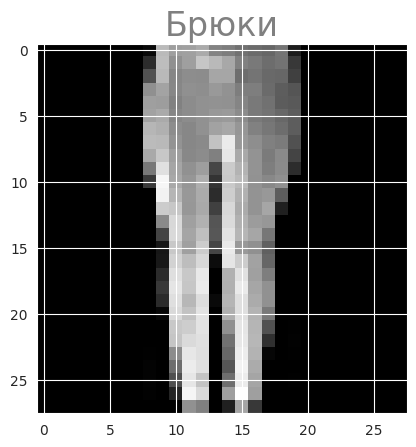

In [ ]:
Input_number = np.random.randint(1,500)
# Загрузка модели
interpreter = lite.Interpreter(model_path="/content/model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


im = x_test[Input_number]
test = im[None, ...].astype(np.float32)
# Предсказание
interpreter.set_tensor(input_details[0]['index'], test)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Обработка результата
res = np.squeeze(output_data)
name = name_class[np.argmax(res)]

plt.imshow(im, cmap='gray')
plt.title(name, c='gray', fontsize=24)
plt.show()

In [ ]:
input_details[0]['shape']

array([ 1, 28, 28,  1], dtype=int32)